In [187]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore")

In [188]:
# Importamos el sopooporte de procesamiento de nuestro src
from src import soporte_preprocesamiento as sp

In [189]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)


In [190]:
df = pd.read_csv("datos/api_rent_madrid.csv", sep=";", index_col=0).reset_index()


In [191]:
df.head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,1.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.0,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,es,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,11.0,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,False,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,Madrid,Villamanrique de Tajo,es,40.069.197,-3.241.383,False,55041,"A estrenar ático con piscina en Calle Madrid, ...",False,good,False,6.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Villamanrique de Tajo', 'title':...",False,False,True,False,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,Toledo,Recas,es,400.536.974,-39.912.159,False,47186,REDPISO alquila esta vivienda situada en el mu...,False,good,False,5.0,{'typology': 'flat'},"{'subtitle': 'Recas', 'title': 'Piso en Calle ...",False,False,False,False,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


A primera vista vemos que hay casas de varias provincias, pero para nuestro analisis de precios, nos interesan solo las que están situadas en la provincia de Madrid pues son las que nos piden que predizcamos los precios. Así pues filtramos nuestro dataframe con esa  condición



In [192]:
df = df[df['province'] == 'Madrid']

Vamos a hacer un análisis exploratorio de nuestro dataFrame para familiarizarnos con las carácterísticas de nuestras varia

In [193]:
sp.exploracion_datos(df)

El número de filas es 358 y el número de columnas es 38

----------

En este conjunto de datos tenemos 5 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


description                0.279330
hasVideo                   3.910615
status                     3.910615
newDevelopment             3.910615
priceByArea                3.910615
detailedType               3.910615
suggestedTexts             3.910615
hasPlan                    3.910615
has3DTour                  3.910615
has360                     3.910615
hasStaging                 3.910615
superTopHighlight          3.910615
topNewDevelopment          3.910615
externalReference         22.905028
floor                     18.435754
district                  14.525140
neighborhood              51.396648
hasLift                    5.027933
parkingSpace              75.698324
labels                    91.899441
newDevelopmentFinished    95.251397
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
propertyCode,358.0,9.494634e+07,1.328349e+07,666696.0,97722784.25,98669278.0,98896452.50,98939685.0
numPhotos,358.0,2.097207e+01,9.120685e+00,0.0,15.00,20.0,28.00,72.0
price,358.0,6.928603e+02,6.113994e+01,400.0,652.00,700.0,740.00,750.0
size,358.0,6.004749e+01,2.386886e+01,20.0,45.00,57.0,71.75,206.0
rooms,358.0,1.547486e+00,9.298847e-01,0.0,1.00,2.0,2.00,4.0
bathrooms,358.0,1.120112e+00,3.340407e-01,1.0,1.00,1.0,1.00,3.0
distance,358.0,1.678829e+04,1.348319e+04,183.0,5656.75,12383.0,26518.75,56596.0
priceByArea,344.0,1.322384e+01,5.111516e+00,3.0,10.00,12.0,16.00,33.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,358,6,flat,282
operation,358,1,rent,358
address,358,324,"Calle Valle de Ambles, 2",10
province,358,1,Madrid,358
municipality,358,62,Madrid,170
country,358,1,es,358
latitude,358,344,404.430.651,10
longitude,358,344,-34.659.877,10
description,357,341,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,10
hasVideo,344,2,False,235



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 1 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            358 non-null    int64  
 1   numPhotos               358 non-null    int64  
 2   price                   358 non-null    float64
 3   propertyType            358 non-null    object 
 4   operation               358 non-null    object 
 5   size                    358 non-null    float64
 6   exterior                358 non-null    bool   
 7   rooms                   358 non-null    int64  
 8   bathrooms               358 non-null    int64  
 9   address                 358 non-null    object 
 10  province                358 non-null    object 
 11  municipality            358 non-null    object 
 12  country                 358 non-null    object 
 13  latitude                358 non-null

None

En este primer análisis exploratorio detectamos que tenemos 5 duplicados, eliminamos esas filas

In [194]:


df = df.drop_duplicates()
df = df.reset_index(drop=True)


También detectamos que hay 3 columnas con un porcentaje de nulos muy elevado . Son: "parkingSpace", "labels" "newDevelopmentFinished".

Sacamos sus valores únicos


In [195]:
valores_unicos_parking_space = df['parkingSpace'].unique()
valores_unicos_labels = df['labels'].unique()
valores_unicos_new_development_Finished = df['newDevelopmentFinished'].unique()

valores_unicos = {
    'Espacio de Estacionamiento': valores_unicos_parking_space,
    'Etiquetas': valores_unicos_labels,
    'Desarrollo Terminado': valores_unicos_new_development_Finished
}

print(valores_unicos)


{'Espacio de Estacionamiento': array([nan,
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}"],
      dtype=object), 'Etiquetas': array([nan, "[{'name': 'apartamentoType', 'text': 'Apartamento'}]"],
      dtype=object), 'Desarrollo Terminado': array([nan, False, True], dtype=object)}


Nos falta información para imputarlas de manera lógica así que vamos a elimarlas.

In [196]:
df = df.drop(columns=['parkingSpace', 'labels', 'newDevelopmentFinished'])



In [197]:
# Mostramos las columnas con las que nos hemos quedado
df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift'],
      dtype='object')

Por otro lado, las columnas que tomen un solo valor no aportan nada a la predicción de precios, así que las vamos a guardar en otro dataframe y las eliminamos de df.

In [198]:
# Identificamos y mostramos las columnas que toman un único valor
columnas_univalor = [col for col in df.columns if df[col].nunique() == 1]
columnas_univalor


['operation',
 'province',
 'country',
 'hasStaging',
 'superTopHighlight',
 'topNewDevelopment']

In [199]:
# Guardamos esas columnas en otro dataFrame y las eliminamos del dataFrame principal
df_columnas_univalor = df[columnas_univalor]
df = df.drop(columns=columnas_univalor)
df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'municipality', 'latitude',
       'longitude', 'showAddress', 'distance', 'description', 'hasVideo',
       'status', 'newDevelopment', 'priceByArea', 'detailedType',
       'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'externalReference',
       'floor', 'district', 'neighborhood', 'hasLift'],
      dtype='object')

In [200]:
df["latitude"].value_counts()


latitude
404.430.651    7
403.809.876    2
402.003.307    2
403.082.527    2
404.646.164    1
              ..
400.286.737    1
404.203.748    1
404.911.883    1
404.074.632    1
400.318.018    1
Name: count, Length: 344, dtype: int64

In [201]:
df["longitude"].value_counts()

longitude
-34.659.877    7
-36.338.528    2
-36.919.489    2
-37.365.244    2
-36.489.179    1
              ..
-36.013.388    1
-36.768.541    1
-39.639.014    1
-37.032.414    1
-36.022.527    1
Name: count, Length: 344, dtype: int64

In [202]:
df.head()

,propertyCode,numPhotos,price,propertyType,size,exterior,rooms,bathrooms,address,municipality,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,externalReference,floor,district,neighborhood,hasLift
0,91615378,12,750.0,flat,60.0,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.0,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,AV23,3,Hortaleza,Canillas,True
1,88363329,21,750.0,flat,70.0,True,2,1,Gregorio izquierdo,San Sebastián de los Reyes,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,11.0,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,NaN,bj,Centro Urbano,NaN,False
2,98621753,28,400.0,penthouse,67.0,True,2,2,Calle Madrid,Villamanrique de Tajo,40.069.197,-3.241.383,False,55041,"A estrenar ático con piscina en Calle Madrid, ...",False,good,False,6.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Villamanrique de Tajo', 'title':...",False,False,True,90004,2,NaN,NaN,False
3,98568766,11,590.0,flat,70.0,True,3,2,Rascafría,Rascafría,409.073.967,-38.815.996,False,56596,"-RASCAFRÍA- Piso de 70 m², exterior, amueblado...",False,good,False,8.0,{'typology': 'flat'},"{'subtitle': 'Rascafría', 'title': 'Piso'}",False,False,False,2539,NaN,NaN,NaN,False
4,98323777,17,684.0,studio,45.0,True,0,1,"Av. José Antonio Corrales, 2",Madrid,404.855.273,-36.155.982,True,10656,"STUDIO SIN AMUEBLAR CON GARAJE, TRASTERO Y PIS...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que hay latitudes y longitudes incorrectamente formateadas. Muchas latitudes no están estre -90 y 90 grados y tanto longitud como latitud tienen dos ocurrenciencias del caracter "." que impiden pasarlas a real. Vamos a formatearlas correctamente.

In [203]:
df["latitude"] = df["latitude"].apply(lambda x: float(x.replace(".","")[:2] + "." + x.replace(".","")[2:]))
df["longitude"] = df["longitude"].apply(lambda x: float(x.replace(".","")[:2] + "." + x.replace(".","")[2:]))

Hacemos un describe de ambas columnas para comprobar que ahora están bien formateadas

In [204]:
df[["latitude", "longitude"]].describe()


,latitude,longitude
count,353.000000,353.000000
mean,40.414711,-3.685982
std,0.138752,0.176475
min,40.028236,-4.305336
25%,40.347598,-3.741659
50%,40.411703,-3.692530
75%,40.474405,-3.604437
max,40.907397,-3.241383


El priceByArea podemos descartarlo ya que es una variable que deriva de otras dos, no aporta al análisis porque está directamente relacionado con otras variables independientes.

In [205]:
df = df.drop(columns=['priceByArea'])

### Columnas numéricas.

In [206]:
visualizador =sp.Visualizador(df)

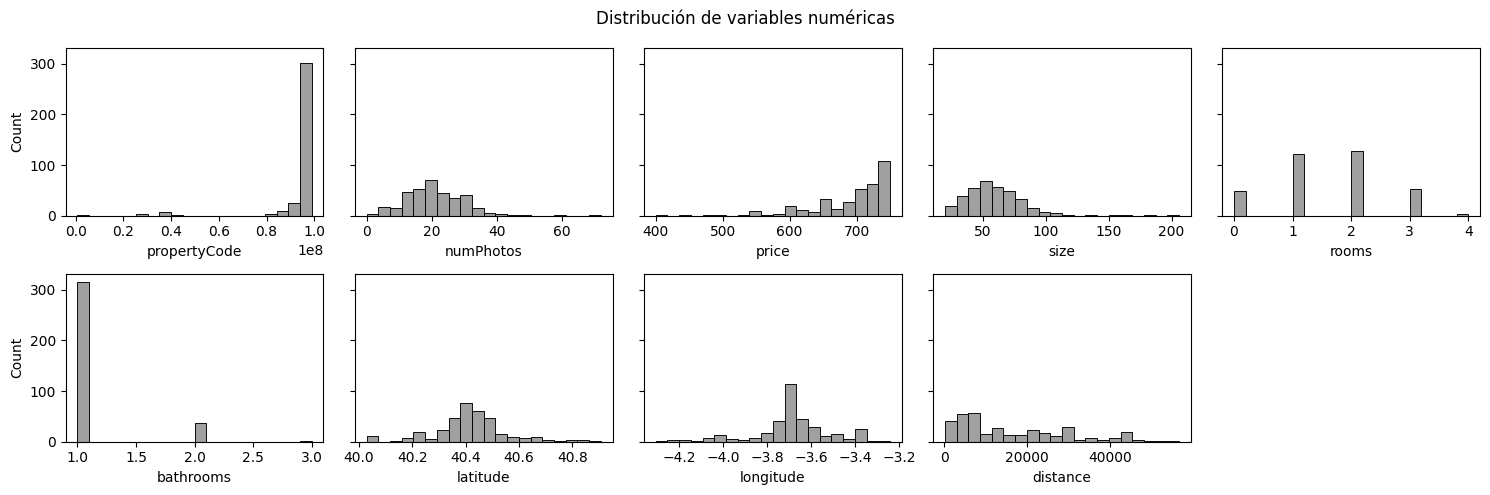

In [207]:
visualizador.plot_numericas()

In [208]:
df.describe()

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance
count,3.530000e+02,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,9.489911e+07,21.002833,692.932011,59.728045,1.543909,1.110482,40.414711,-3.685982,16698.824363
std,1.337145e+07,9.175219,61.307820,23.799745,0.934760,0.322857,0.138752,0.176475,13549.504221
min,6.666960e+05,0.000000,400.000000,20.000000,0.000000,1.000000,40.028236,-4.305336,183.000000
25%,9.768517e+07,15.000000,650.000000,45.000000,1.000000,1.000000,40.347598,-3.741659,5656.000000
50%,9.867310e+07,20.000000,700.000000,57.000000,2.000000,1.000000,40.411703,-3.692530,12321.000000
75%,9.889680e+07,28.000000,740.000000,70.000000,2.000000,1.000000,40.474405,-3.604437,26558.000000
max,9.893968e+07,72.000000,750.000000,206.000000,4.000000,3.000000,40.907397,-3.241383,56596.000000


A la vista de las gráficas y el describe anterior podemos observar que:

**propertyCode**: Funciona como un id, pero esta sesgado hasta valores muy altos, y no aporta información relevante al análisis. La eliminamos.

**numPhotos**: La mayoría de las propiedades tienen entre 15 y 30 fotos, con algunas pocas alcanzando hasta 72.
La media es de 21 fotos por propiedad, pero hay propiedades sin fotos (min = 0). Este podría ser un punto a explorar, ya que podría influir en el interés de los arrendados o el precio del alquiler

**price**: Es nuestra variable objerivo. La mayoría de los precios están entre 650 y 750 euros. Hay algunas propiedades con precios bajos (min = 400 euros). La desviación estándar es baja (61.31), lo que sugiere escasa variación en los precios de las propiedades, pero las propiedades de menor precio podrían ser más pequeñas o menos atractivas.

**size**: La mayoría de las propiedades tienen entre 40 y 70 m², con algunas propiedades más grandes alcanzando los 206 m².El tamaño promedio  59,72 m²,  con una desviación estándar de 23,80. Las propiedades más grandes son menos comunes y podrían ser más caras o ubicarse en zonas exclusivas.

**rooms** :La mayoría de las propiedades tienen entre 1 y 2 habitaciones. Algunas propiedades tienen hasta 4 habitaciones. La mediana es de 2 habitaciones, mientras que el promedio es de 1,54, indicando que las propiedades con más habitaciones son relativamente raras, podrían ser más espaciosas y estar mejor valoradas.

**bathrooms**: Predominan las propiedades con 1 baño, algunas tienen hasta 3 baños.
El promedio es de 1,11 baños, con la mediana en 1. lo que sugiere que las propiedades con más baños son una minoría

**latitud y longitud**: Las latitudes y longitudes ofrecen valroes consistentes con la localización de Madrid, lo que indica que no se nos ha colado ninguna propiedad de fuera de la provincia. Rango de latitudes: 40,02 a 40,90.
Rango de longitudes: -4,30 a -3,24.

**distance**: Las distancias se miden con respecto al centro de Madrid. Muchas propiedades están a menos de 20.000 metros del centro. Algunas propiedades más alejadas alcanzan hasta 56.596 metros. La distancia promedio es de 16.698 metros, pero la gran desviación estándar 13.549 metros sugiere una alta variabilidad. Sería útil analizar cómo la distancia influye en el precio. Las propiedades más alejadas podrían ser más baratas.

**priceByArea**: La mayoría oscila entre 10 y 16 euros/m². Algunas propiedades alcanzan hasta 33 euros/m². La media es de 13.29 euros/m² y la mediana 12 euros/m². Los valores más grandes están probablemente relacionados con propiedades céntricas o de lujo.








Eliminamos la columna "propertyCode"

In [209]:
df.drop(columns=["propertyCode"], inplace=True)

### Columnas categóricas.

Antes de representar las distribuciones de las categorías categóricas recordemos la tabla de estadísticos de estas columnas que nos proporcionó la función exploración_datos(df) para analizar que podemos hacer con algunas de estas columnas

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>unique</th>
      <th>top</th>
      <th>freq</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>propertyType</th>
      <td>358</td>
      <td>6</td>
      <td>flat</td>
      <td>282</td>
    </tr>
    <tr>
      <th>operation</th>
      <td>358</td>
      <td>1</td>
      <td>rent</td>
      <td>358</td>
    </tr>
    <tr>
      <th>address</th>
      <td>358</td>
      <td>324</td>
      <td>Calle Valle de Ambles, 2</td>
      <td>10</td>
    </tr>
    <tr>
      <th>province</th>
      <td>358</td>
      <td>1</td>
      <td>Madrid</td>
      <td>358</td>
    </tr>
    <tr>
      <th>municipality</th>
      <td>358</td>
      <td>62</td>
      <td>Madrid</td>
      <td>170</td>
    </tr>
    <tr>
      <th>country</th>
      <td>358</td>
      <td>1</td>
      <td>es</td>
      <td>358</td>
    </tr>
    <tr>
      <th>latitude</th>
      <td>358</td>
      <td>344</td>
      <td>404.430.651</td>
      <td>10</td>
    </tr>
    <tr>
      <th>longitude</th>
      <td>358</td>
      <td>344</td>
      <td>-34.659.877</td>
      <td>10</td>
    </tr>
    <tr>
      <th>description</th>
      <td>357</td>
      <td>341</td>
      <td>VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...</td>
      <td>10</td>
    </tr>
    <tr>
      <th>hasVideo</th>
      <td>344</td>
      <td>2</td>
      <td>False</td>
      <td>235</td>
    </tr>
    <tr>
      <th>status</th>
      <td>344</td>
      <td>3</td>
      <td>good</td>
      <td>325</td>
    </tr>
    <tr>
      <th>newDevelopment</th>
      <td>344</td>
      <td>2</td>
      <td>False</td>
      <td>327</td>
    </tr>
    <tr>
      <th>detailedType</th>
      <td>344</td>
      <td>8</td>
      <td>{'typology': 'flat'}</td>
      <td>273</td>
    </tr>
    <tr>
      <th>suggestedTexts</th>
      <td>344</td>
      <td>315</td>
      <td>{'subtitle': 'Suroeste, Torrejón de Ardoz', 't...</td>
      <td>10</td>
    </tr>
    <tr>
      <th>hasPlan</th>
      <td>344</td>
      <td>2</td>
      <td>False</td>
      <td>222</td>
    </tr>
    <tr>
      <th>has3DTour</th>
      <td>344</td>
      <td>2</td>
      <td>False</td>
      <td>339</td>
    </tr>
    <tr>
      <th>has360</th>
      <td>344</td>
      <td>2</td>
      <td>False</td>
      <td>258</td>
    </tr>
    <tr>
      <th>hasStaging</th>
      <td>344</td>
      <td>1</td>
      <td>False</td>
      <td>344</td>
    </tr>
    <tr>
      <th>superTopHighlight</th>
      <td>344</td>
      <td>1</td>
      <td>False</td>
      <td>344</td>
    </tr>
    <tr>
      <th>topNewDevelopment</th>
      <td>344</td>
      <td>1</td>
      <td>False</td>
      <td>344</td>
    </tr>
    <tr>
      <th>externalReference</th>
      <td>276</td>
      <td>268</td>
      <td>CG-91792-0001</td>
      <td>2</td>
    </tr>
    <tr>
      <th>floor</th>
      <td>292</td>
      <td>13</td>
      <td>1</td>
      <td>70</td>
    </tr>
    <tr>
      <th>district</th>
      <td>306</td>
      <td>83</td>
      <td>Centro</td>
      <td>47</td>
    </tr>
    <tr>
      <th>neighborhood</th>
      <td>174</td>
      <td>74</td>
      <td>Lavapiés-Embajadores</td>
      <td>11</td>
    </tr>
    <tr>
      <th>hasLift</th>
      <td>340</td>
      <td>2</td>
      <td>True</td>
      <td>179</td>
    </tr>
    <tr>
      <th>parkingSpace</th>
      <td>87</td>
      <td>5</td>
      <td>{'hasParkingSpace': True, 'isParkingSpaceInclu...</td>
      <td>83</td>
    </tr>
    <tr>
      <th>labels</th>
      <td>29</td>
      <td>1</td>
      <td>[{'name': 'apartamentoType', 'text': 'Apartame...</td>
      <td>29</td>
    </tr>
    <tr>
      <th>newDevelopmentFinished</th>
      <td>17</td>
      <td>2</td>
      <td>True</td>
      <td>12</td>
    </tr>
  </tbody>
</table>
</div>

Aquí podemos observar algunas categorías que descartar para nuestro análisis, como pueden ser address ,description, suggestedTexts y externalReference, que tienen muchos valores únicos y no serán relevantes en nuestro modelo predictivo. También echando un vistazo a detailedType vemos que no aporta información relevante que no aporte ya propertyType. Por otro lado, "neighborhood" y "district" tienen valores nulos, la informacion que aporta sobre loacalización puede ser obtenida por municipality, district, distance y latitud y longitud, asi que las eliminamos también

In [210]:
df.drop(columns=["address", "description", "suggestedTexts", "externalReference", "detailedType", "neighborhood", "district"], inplace=True)


Vamos a imputar los nulos de las categorías categóricas con el valor "desconocido"

In [211]:
columnas_categoricas = df.select_dtypes('O').columns
df[columnas_categoricas] = df[columnas_categoricas].fillna("desconocido")

In [212]:
columnas_categoricas

Index(['propertyType', 'municipality', 'hasVideo', 'status', 'newDevelopment',
       'hasPlan', 'has3DTour', 'has360', 'floor', 'hasLift'],
      dtype='object')

Sacamos gráficas de las distribuciones

In [213]:
visualizador = sp.Visualizador(df)

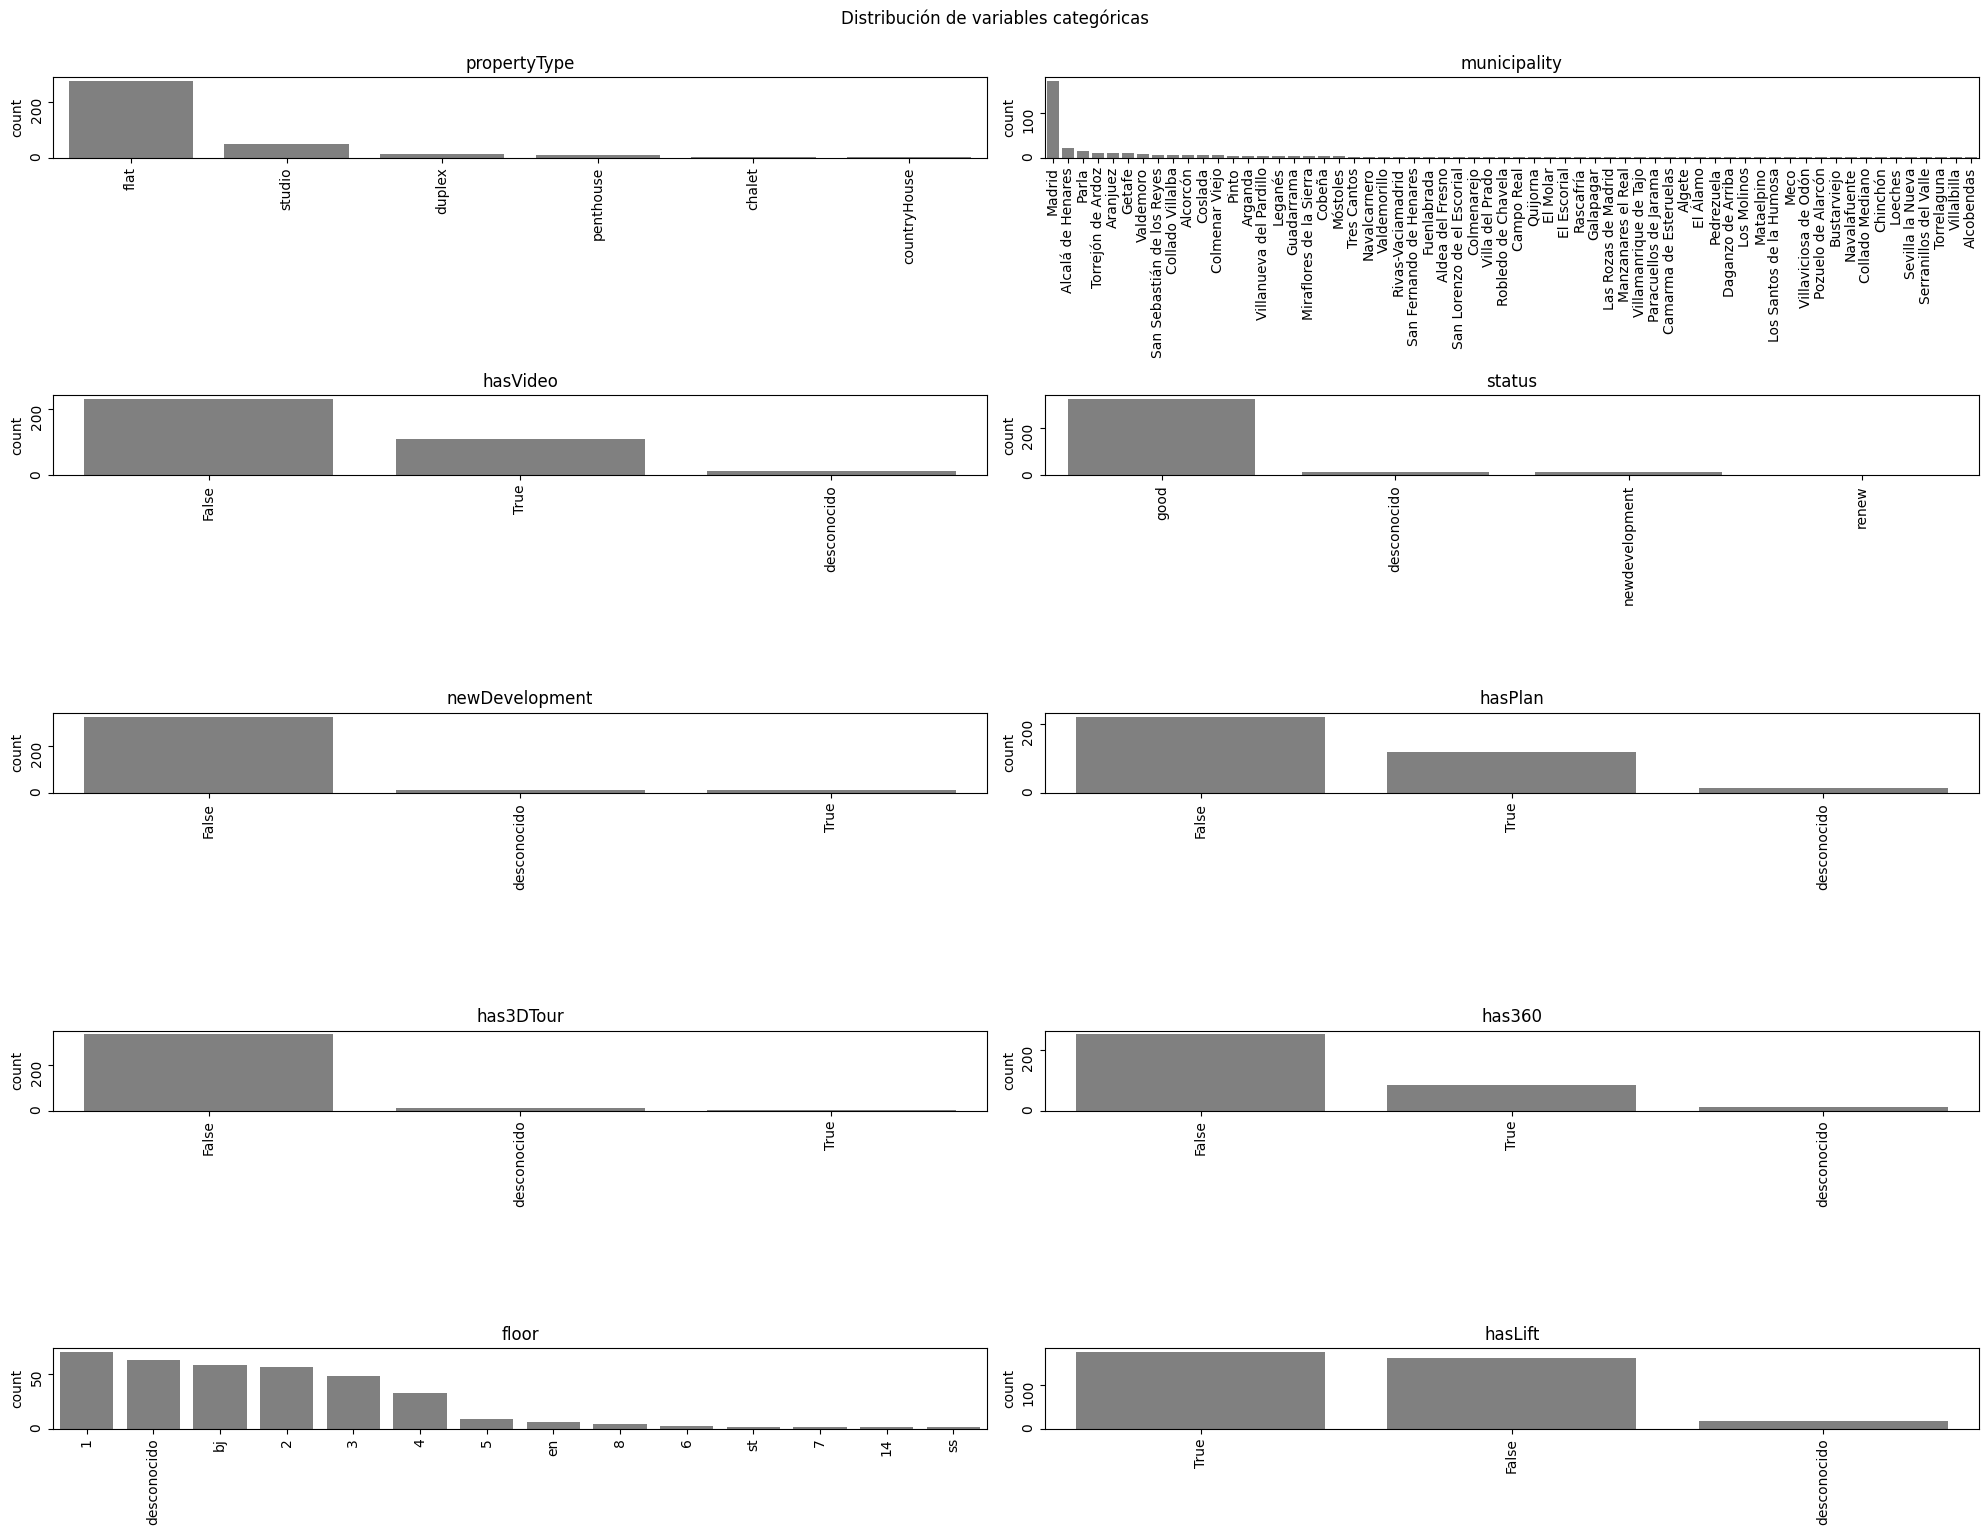

In [214]:
visualizador.plot_categoricas()

**propertyType**: La mayoría de las propiedades son de tipo "flat" (apartamento), seguido de una pequeña cantidad de "studio" y "penthouse".
lo que indica que en nuestros datos predominan los apartamentos con poca representación de propiedades como chalets o casas rurales.

**municipality**: Hay una gran variedad de municipios, destacando sobremanera en frecuencia Madrid, seguido por Alcalá de Henares, parla y Aranjuez. La mayoría de las propiedades están concentradas en algunos municipios más grandes y poblados, lo que es un factor a tener en cuenta en el análisis de precios.

**status**: Los valores predominantes son "good" (bueno) y "newdevelopment" (nueva construcción), con algunos registros marcados como "desconocido". La mayoría de las propiedades están en buen estado, con una menor proporción siendo de nueva construcción.

**hasVideo**: La mayoría de los anuncios no incluyen videos (False), aunque una cantidad menor los tiene (True). Los anuncios con videos pueden representar propiedades mejor promocionadas que atraigan a más clientes y puedan conseguir un mayor precio de alquiler.

**newDevelopment**: Predominan las propiedades que no son nuevas (False) La mayoría de las propiedades son de segunda mano. Esta variable da información redundante con status, así que la eliminaremos.

**hasPlan**: Una proporción significativa de propiedades incluye planos (True), aunque la mayoría no los tiene (False). También hay algunos datos faltantes representados por "desconocido": Los planos son una herramienta de venta relevante, aunque no están presentes en todos los anuncios así que es posible que influyan en los precios

**has3DTour**: Muy pocas propiedades tienen tours 3D disponibles (True), siendo la mayoría sin esta característica (False o "desconocido"). Es una tecnología emergente que igual pocos pisos han tenido disponible. Analizaremos más adelante si esta variable es importante para el modelo.

**has360**: Al igual que en has3DTour, la mayoría de las propiedades no cuentan con visualizaciones 360° (False). Las imágenes 360° son una tecnología emergente en el mercado inmobiliario, con baja implementación hasta ahora. Analizaremos más adelante si esta variable es importante para el modelo.

**floor**: Los pisos bajos (e.g., "1", "bajo") son los más comunes, mientras que hay propiedades en pisos más altos (e.g., "6", "8") pero en menor proporción. Es normal que predominen los pisos bajos, porque hay edificicos de pocas plantas  que no tienen plantas altas, pero todos tienen plantas bajas.

**hasLift**: Las propiedades están aproximadamente equilibradas entre aquellas que tienen ascensor (True) y las que no (False), aunque también hay datos marcados como "desconocido". La disponibilidad de ascensor puede ser un factor importante, especialmente para propiedades en pisos superiores.

In [215]:
df.drop(columns = "newDevelopment", inplace=True)

"bathrooms" y "rooms" son variables numericas, pero discretas, que se pueden categorizar, pues pueden expresar orden

In [216]:
df["bathrooms"] = df["bathrooms"].astype("object")
df["rooms"] = df["rooms"].astype("object")

In [217]:
df.head()

,numPhotos,price,propertyType,size,exterior,rooms,bathrooms,municipality,latitude,longitude,showAddress,distance,hasVideo,status,hasPlan,has3DTour,has360,floor,hasLift
0,12,750.0,flat,60.0,True,1,1,Madrid,40.464616,-3.648918,True,7037,False,good,False,False,False,3,True
1,21,750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,40.550086,-3.627808,False,16145,True,good,True,False,False,bj,False
2,28,400.0,penthouse,67.0,True,2,2,Villamanrique de Tajo,40.069197,-3.241383,False,55041,False,good,False,False,True,2,False
3,11,590.0,flat,70.0,True,3,2,Rascafría,40.907397,-3.881600,False,56596,False,good,False,False,False,desconocido,False
4,17,684.0,studio,45.0,True,0,1,Madrid,40.485527,-3.615598,True,10656,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido


Por último veamos la correlación entre las variables, para ver si hubiera alguna que representara lo mismo que otra, o que su correlación con la variable objetivo "price" fuera muy cercana a cero.

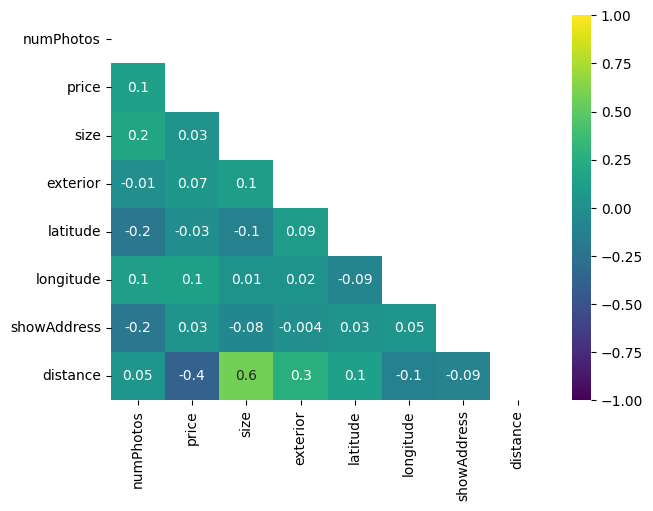

In [218]:
visualizador.correlacion()

En primer lugar observamos que no hay una correlacion lo suficientemente fuerte entre dos variables, como para quedarnos solo con una de ellas, lasque tienen una mayor correlación son size y distance lo que muestra, que a mayor distancia del centro de Madrid más grande es la vivienda. Ninguna variable tiene correlación fuerte con price, la que más distance, que es negativa lo que viene a sugerir algo de relacióninversa entre distancia al centro y precio

Exterior y show Address son booleanas. Tratadas como numericas muestran casi nula correlación con price, pero tal vez las categoricemos más adelante. De momento las dejamos, longitud y latitud muestran una correlación muy baja con price, pero pueden ser utiles para algoritmos como knn, de momento las dejamos.
 
numPhotos tiene muy poca correlación con price y con las demás variables, no parece que aporte valor al modelo, así pues la eliminamos.

In [219]:
df.drop(columns = "numPhotos", inplace=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         353 non-null    float64
 1   propertyType  353 non-null    object 
 2   size          353 non-null    float64
 3   exterior      353 non-null    bool   
 4   rooms         353 non-null    object 
 5   bathrooms     353 non-null    object 
 6   municipality  353 non-null    object 
 7   latitude      353 non-null    float64
 8   longitude     353 non-null    float64
 9   showAddress   353 non-null    bool   
 10  distance      353 non-null    int64  
 11  hasVideo      353 non-null    object 
 12  status        353 non-null    object 
 13  hasPlan       353 non-null    object 
 14  has3DTour     353 non-null    object 
 15  has360        353 non-null    object 
 16  floor         353 non-null    object 
 17  hasLift       353 non-null    object 
dtypes: bool(2), float64(4), int64(

In [221]:
columnas_numericas = df.select_dtypes('number').columns

In [222]:
columnas_numericas

Index(['price', 'size', 'latitude', 'longitude', 'distance'], dtype='object')

Ninguna de estas variables tiene nulos por lo que no tenemos que imputarlos (price es la variable a predecir por lo que en ningún caso la imputaríamos).

Guardamos los datos en un csv para tratar con ellos en otros notebooks.

In [223]:
df.to_csv("datos/datos_limpios.csv")